**Author: Samar Shaikh**

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load Data**

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
df = pd.read_csv('iris.csv', names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Mapping**

In [ ]:
mapping = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}
df['species'] = df['species'].apply(lambda x: mapping[x])
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[10:]

,sepal-length,sepal-width,petal-length,petal-width,species
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
14,5.8,4.0,1.2,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('species', axis=1).values
y = df['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Converting Data to Tensors**

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
X_train

tensor([[4.6000, 3.6000, 1.0000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.5000, 1.4000, 0

**Create Model**

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(4, 16)
    self.fc2 = nn.Linear(16, 12)
    self.out = nn.Linear(12, 3)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

model = Network()
model

Network(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (out): Linear(in_features=12, out_features=3, bias=True)
)

**Training Neural Net**

In [ ]:
#Set Hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Training Loop
%%time
epochs = 100
losses = []

for i in range(epochs):
  y_hat = model.forward(X_train)
  loss = criterion(y_hat, y_train)
  losses.append(loss)
  if i%10 == 0:
    print(f'Epochs: {i} Loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs: 0 Loss: 1.0727407932281494
Epochs: 10 Loss: 0.7999176383018494
Epochs: 20 Loss: 0.4706929624080658
Epochs: 30 Loss: 0.2698439061641693
Epochs: 40 Loss: 0.14036177098751068
Epochs: 50 Loss: 0.08537804335355759
Epochs: 60 Loss: 0.0686647966504097
Epochs: 70 Loss: 0.06238998845219612
Epochs: 80 Loss: 0.05936678498983383
Epochs: 90 Loss: 0.05760285630822182
CPU times: user 126 ms, sys: 16.6 ms, total: 142 ms
Wall time: 312 ms


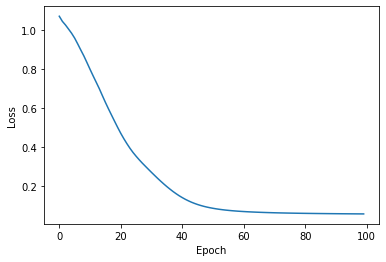

In [ ]:
#visualizing Loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss');

**Validating The Model**

In [ ]:
preds = []
with torch.no_grad():
  for val in X_test:
    y_hat = model.forward(val)
    preds.append(y_hat.argmax().item())
df2 = pd.DataFrame({'Y': y_test, 'YHat': preds})
df2

,Y,YHat
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


**Calculating Accuracy**

In [ ]:
df2['correct'] = [1 if corr == preds else 0 for corr, preds in zip(df2['Y'], df2['YHat'])]
acc = df2['correct'].sum()/len(df2)
print(f'Accuracy is: {acc*100}%')

Accuracy is: 100.0%


In [ ]:
#Prediction on Unknown Data
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
data = torch.Tensor([4.0, 3.3, 1.7, 0.5])
data

tensor([4.0000, 3.3000, 1.7000, 0.5000])

In [ ]:
with torch.no_grad():
  print(model(data))
  print(labels[model(data).argmax()])

tensor([  9.5315,   4.2039, -17.6276])
Iris-setosa
